In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datamate import Directory

from flyvision import results_dir
from flyvision.datasets.flashes import Flashes
from flyvision import Network, NetworkDir, NetworkView
from flyvision.animations.hexscatter import HexScatter
from flyvision.utils.activity_utils import LayerActivity

%load_ext autoreload
%autoreload 2

In [2]:
dataset = Flashes(dynamic_range=[0, 1],
    t_stim=1,
    t_pre=1.0,
    dt=1/200,
    radius=[-1, 6],
    alternations=(0, 1, 0),
    filter_type="median",
    hex_sample=True,)

<IPython.core.display.Javascript object>


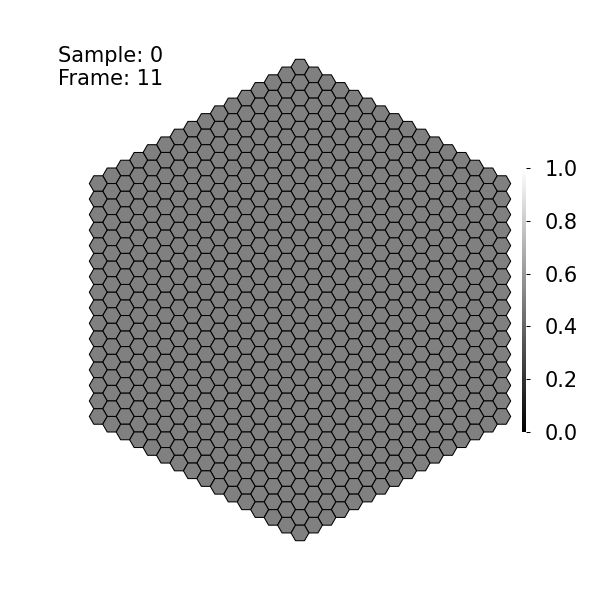

/home/lappalainenj@hhmi.org/flyvision_dmn/flyvision/animations/hexscatter.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


In [6]:
%matplotlib notebook
animation = HexScatter(dataset[3][None, ::50, None], vmin=0, vmax=1)
animation.notebook_animation()

In [3]:
results_dir = Directory(results_dir)

In [4]:
ensemble_dir = results_dir / "opticflow/000"

In [5]:
validation_loss = {}
for model_name, model_dir in ensemble_dir.items():
    validation_loss[model_name] = model_dir.validation_loss[()]

In [6]:
validation_loss = dict(sorted(validation_loss.items(), key=lambda kv: validation_loss[kv[0]]))

In [7]:
validation_loss

{'0028': 5.136557112137477,
 '0011': 5.1910432005922,
 '0010': 5.220126719938384,
 '0041': 5.247156371672948,
 '0045': 5.251272610492176,
 '0038': 5.259885032143858,
 '0002': 5.260432395670149,
 '0017': 5.262506494919459,
 '0027': 5.26999799741639,
 '0031': 5.270350070463286,
 '0026': 5.271915781829092,
 '0023': 5.277487408783701,
 '0018': 5.277920800778601,
 '0034': 5.281195688578817,
 '0025': 5.283142616351445,
 '0021': 5.285234338707394,
 '0043': 5.289696128831969,
 '0042': 5.291882056328985,
 '0040': 5.292151802115971,
 '0015': 5.295515714420213,
 '0005': 5.295636435349782,
 '0007': 5.296880326337284,
 '0014': 5.298010385698742,
 '0033': 5.2988701777325735,
 '0035': 5.299407997065121,
 '0004': 5.300875236590703,
 '0022': 5.303517184323734,
 '0016': 5.306977924373415,
 '0037': 5.308157583077748,
 '0020': 5.318766646915012,
 '0032': 5.319535469015439,
 '0049': 5.319623884227541,
 '0001': 5.324388653039932,
 '0029': 5.328959693511327,
 '0012': 5.330954361293051,
 '0030': 5.33160511983

In [8]:
best_model_dir = ensemble_dir / "0028"

In [9]:
best_model_view = NetworkView(best_model_dir)

In [10]:
network = best_model_view.init_network(chkpt="best_chkpt")

In [36]:
dataset.arg_df

,baseline,intensity,radius
0,0.5,0,-1
1,0.5,0,6
2,0.5,1,-1
3,0.5,1,6


In [37]:
dataset.t_pre

1.0

In [38]:
network.simulate??

In [ ]:
network.stimulus_response

In [51]:
dataset.t_stim

1.0

In [29]:
dataset.dt = 1/200

In [84]:
on_flash_response = network.simulate(dataset[3][None, :, None], 1/200)
on_flash_response = LayerActivity(on_flash_response.cpu(), network.ctome, keepref=True)

In [85]:
off_flash_response = network.simulate(dataset[1][None, :, None], 1/200)
off_flash_response = LayerActivity(off_flash_response.cpu(), network.ctome, keepref=True)

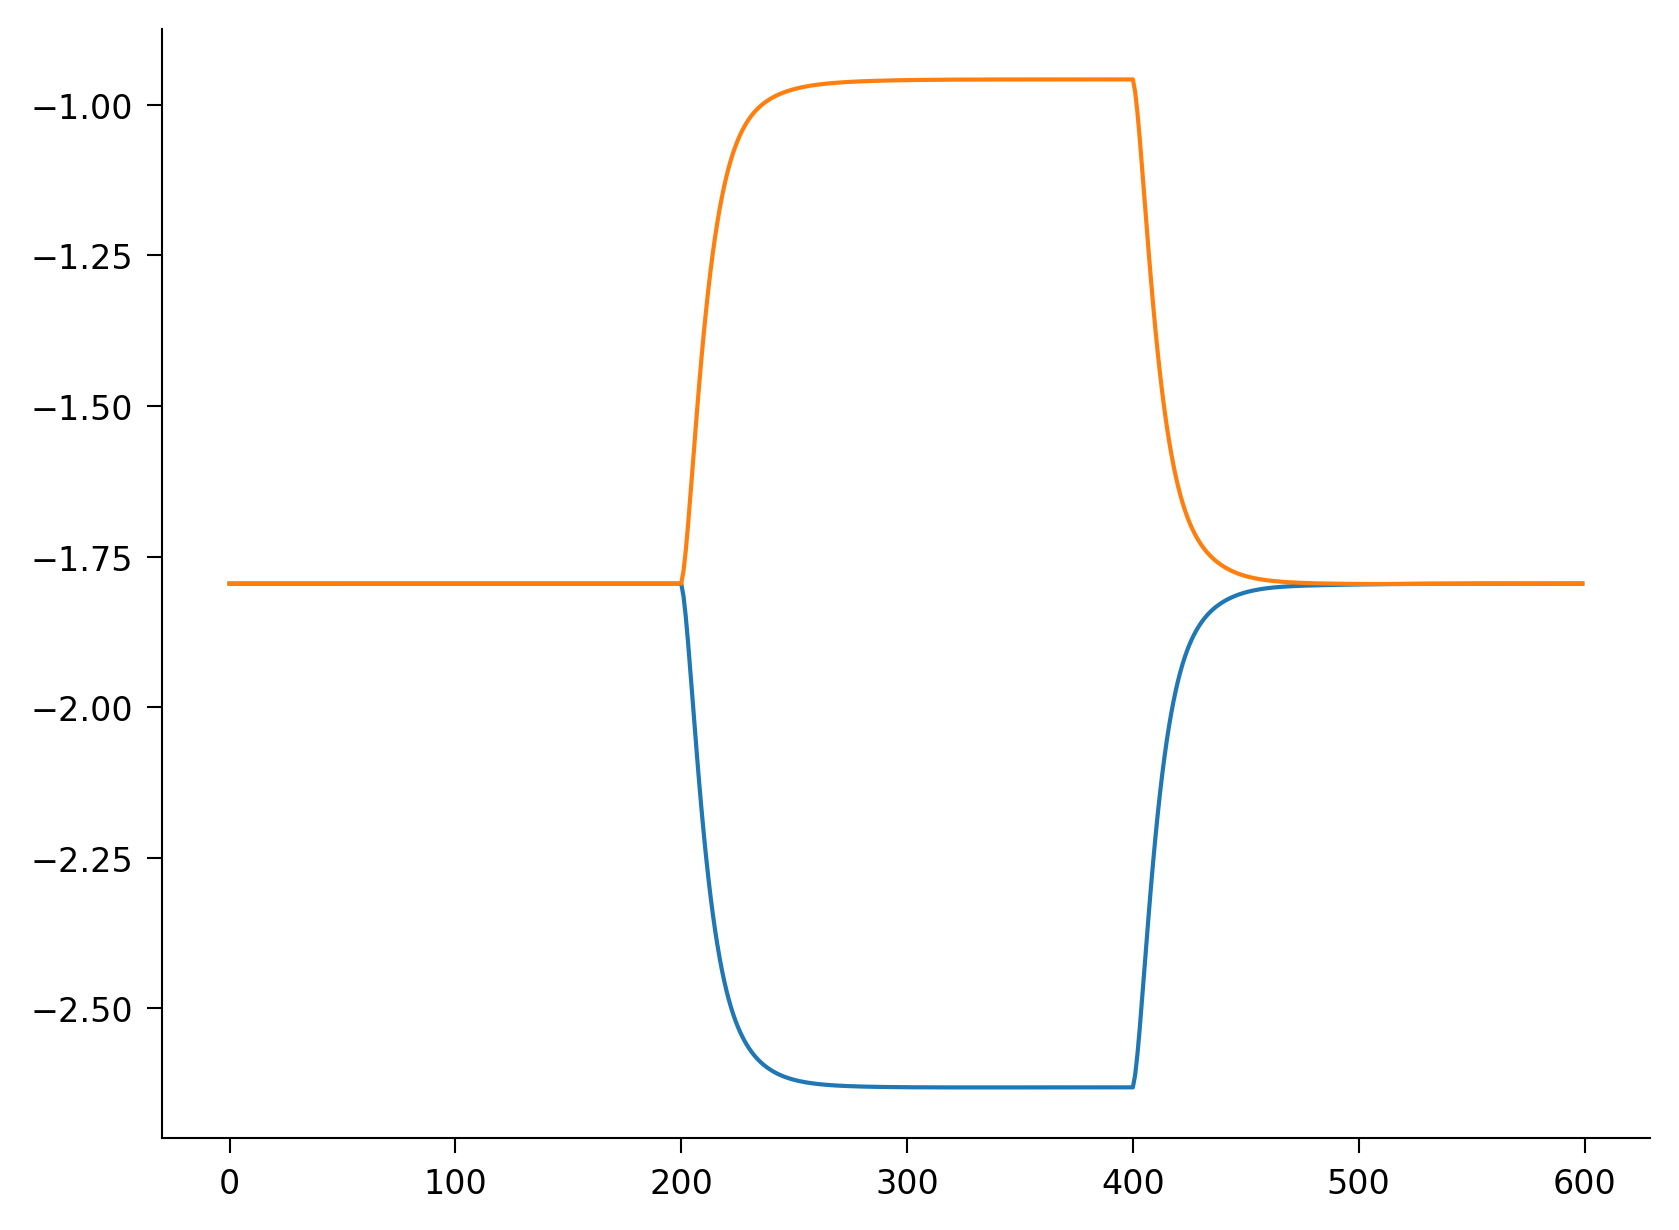

In [91]:
%matplotlib inline
plt.plot(on_flash_response.central.L1.squeeze(), label="L1 ON-flash response")
plt.plot(off_flash_response.central.L1.squeeze(), label="L1 OFF-flash response")
plt.show()

In [30]:
def flash_response_index(dataset, r_on, r_off, nonnegative=True):
    
    # to numpy, because tensors lead to unexpected behavior
    r_on = np.array(r_on)
    r_off = np.array(r_off)
    
    t_stim = dataset.config.t_stim
    n_alternations = len(
        dataset.config.alternations
    )  # alternations baseline - flash - baseline
    dt = dataset.config.dt
    time = np.arange(0, t_stim * n_alternations, dt)

    # relevant time window
    # start one time step before stimulus onset at which both potentials
    # should be at the same resting state.
    mask = (time >= t_stim - dt) & (time < 2 * t_stim)
    r_on = r_on[mask]
    r_off = r_off[mask]


    # because conventionally, index computed on nonnegative spike rates
    # or calcium traces. lifting the traces to nonnegative magnitudes
    if nonnegative:
        minimum = np.minimum(r_on, r_off).min(axis=0)
        r_on += np.abs(minimum)
        r_off += np.abs(minimum)


    on_peak = r_on.max(axis=0)
    off_peak = r_off.max(axis=0)
    fri = on_peak - off_peak
    fri /= on_peak + off_peak + 1e-16

    return fri

In [106]:
flash_response_index(dataset, on_flash_response.central.L1.squeeze(), off_flash_response.central.L1.squeeze())
    

-0.3334765041774975

In [5]:
from flyvision import EnsembleDir, Ensemble, EnsembleView

In [6]:
ensemble = EnsembleView(ensemble_dir)

In [11]:
from datamate import Directory
from pathlib import Path
ctome = Directory(Path('/nrs/turaga/lappalainenj/dvs-sim/data/experiments/flow/0092/000/ctome'))

In [12]:
ctome

ctome/ - Last modified: March 09, 2021 15:28:25
├── _meta.yaml
├── central_nodes_index.h5
├── edges/
│   ├── du.h5
│   ├── dv.h5
│   ├── edge_type.h5
│   ├── loss/
│   │   └── .class..h5
│   ├── n_syn.h5
│   ├── n_syn_certainty.h5
│   ├── pf_index/
│   │   ├── Am/
│   │   │   ├── C2.h5
│   │   │   ├── C3.h5
│   │   │   ├── L1.h5
│   │   │   ├── L2.h5
│   │   │   ├── L3.h5
│   │   │   ├── L4.h5
│   │   │   ├── R1.h5
│   │   │   ├── R2.h5
│   │   │   ├── R4.h5
│   │   │   ├── R5.h5
│   │   │   └── T1.h5
│   │   ├── C2/
│   │   │   ├── Am.h5
│   │   │   ├── L1.h5
│   │   │   ├── L2.h5
│   │   │   ├── L3.h5
│   │   │   ├── L4.h5
│   │   │   ├── L5.h5
│   │   │   ├── Lawf2.h5
│   │   │   ├── Mi1.h5
│   │   │   ├── T1.h5
│   │   │   ├── T2.h5
│   │   │   ├── T4a.h5
│   │   │   ├── Tm1.h5
│   │   │   ├── Tm9.h5
│   │   │   └── TmY14.h5
│   │   ├── C3/
│   │   │   ├── Am.h5
│   │   │   ├── CT1M10.h5
│   │   │   ├── L1.h5
│   │   │   ├── L2.h5
│   │   │   ├── L3.h5
│   │   │   ├── L5.h5
│   │  

In [20]:
ensemble[0].init_network()

Network(Namespace(
  connectome = Namespace(
    type = 'Connectome',
    path = '/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/data/fib25-fib19_v2.2.json',
    extent = 15,
    n_syn_fill = 1
  ),
  dynamics = Namespace(activation=Namespace(type='relu')),
  node_config = Namespace(
    bias = Namespace(
      type = 'RestingPotential',
      keys = ['type'],
      form = 'normal',
      mode = 'sample',
      requires_grad = True,
      mean = 0.5,
      std = 0.05,
      penalize = Namespace(activity=True),
      seed = 0
    ),
    time_const = Namespace(
      type = 'TimeConstant',
      keys = ['type'],
      form = 'value',
      value = 0.05,
      requires_grad = True
    )
  ),
  edge_config = Namespace(
    sign = Namespace(type='SynapseSign', form='value', requires_grad=False),
    syn_count = Namespace(
      type = 'SynapseCount',
      form = 'lognormal',
      mode = 'mean',
      requires_grad = False,
      std = 1.0
    ),
    syn_strength = Namespace(
      type =

In [21]:
ctome2 = ensemble[0].network.ctome

In [22]:
nodes_df_1 = ctome.nodes.to_df()

In [23]:
nodes_df_2 = ctome2.nodes.to_df()

In [24]:
(nodes_df_1[["role", "v", "u", "type"]] == nodes_df_2).all()

role    True
v       True
u       True
type    True
dtype: bool

In [25]:
edges_df_2 = ctome2.edges.to_df()

In [26]:
edges_df_1 = ctome.edges.to_df()[edges_df_2.columns]

In [27]:
iloc, column = np.where((edges_df_1 != edges_df_2))

In [28]:
iloc

array([], dtype=int64)

In [63]:
edges_df_1.iloc[iloc]

,target_index,n_syn_certainty,target_u,edge_type,target_v,source_index,dv,du,n_syn,source_v,source_u,target_type,sign,source_type
297639,24039,1.963324,-15,chem,0,13277,1,-3,1.0,-1,-12,T4a,1.0,Mi1
297640,24040,1.963324,-15,chem,1,13278,1,-3,1.0,0,-12,T4a,1.0,Mi1
297641,24041,1.963324,-15,chem,2,13279,1,-3,1.0,1,-12,T4a,1.0,Mi1
297642,24042,1.963324,-15,chem,3,13280,1,-3,1.0,2,-12,T4a,1.0,Mi1
297643,24043,1.963324,-15,chem,4,13281,1,-3,1.0,3,-12,T4a,1.0,Mi1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457486,29801,1.415673,15,chem,-5,44910,-3,2,1.0,-2,13,T5d,-1.0,TmY15
1457487,29802,1.415673,15,chem,-4,44911,-3,2,1.0,-1,13,T5d,-1.0,TmY15
1457488,29803,1.415673,15,chem,-3,44912,-3,2,1.0,0,13,T5d,-1.0,TmY15
1457489,29804,1.415673,15,chem,-2,44913,-3,2,1.0,1,13,T5d,-1.0,TmY15


In [68]:
edges_df_1.iloc[iloc].source_type.unique()

array(['Mi1', 'Mi4', 'T4b', 'T4c', 'T4d', 'T5b', 'T5c', 'T5d', 'TmY15'],
      dtype=object)

In [77]:
from flyvision.connectome import receptive_fields_edge_dfs

In [78]:
rfs = receptive_fields_edge_dfs("T4a", edges_df_1)

In [80]:
rfs.Mi1

,target_index,n_syn_certainty,target_u,edge_type,target_v,source_index,dv,du,n_syn,source_v,source_u,target_type,sign,source_type
288788,24399,1.963324,0,chem,0,13615,0,-1,13.736448,0,1,T4a,1.0,Mi1
289432,24399,1.963324,0,chem,0,13552,1,1,0.861895,-1,-1,T4a,1.0,Mi1
290122,24399,1.963324,0,chem,0,13583,1,0,3.453104,-1,0,T4a,1.0,Mi1
290827,24399,1.963324,0,chem,0,13614,1,-1,3.671033,-1,1,T4a,1.0,Mi1
291458,24399,1.963324,0,chem,0,13524,-1,2,0.897807,1,-2,T4a,1.0,Mi1
292147,24399,1.963324,0,chem,0,13553,0,1,4.514687,0,-1,T4a,1.0,Mi1
292853,24399,1.963324,0,chem,0,13585,-1,0,1.436491,1,0,T4a,1.0,Mi1
293528,24399,1.963324,0,chem,0,13554,-1,1,0.718246,1,-1,T4a,1.0,Mi1
294248,24399,1.963324,0,chem,0,13584,0,0,20.749319,0,0,T4a,1.0,Mi1
294908,24399,1.963324,0,chem,0,13523,0,2,1.436491,0,-2,T4a,1.0,Mi1


In [81]:
rfs = receptive_fields_edge_dfs("T4a", edges_df_2)

In [7]:
on_flash_response = np.array(list(ensemble.simulate(dataset[3][None, :, None], 1/200)))
on_flash_response = LayerActivity(on_flash_response, ensemble[0].network.ctome, keepref=True)

In [8]:
off_flash_response = np.array(list(ensemble.simulate(dataset[1][None, :, None], 1/200)))
off_flash_response = LayerActivity(off_flash_response, ensemble[0].network.ctome, keepref=True)

In [9]:
r_on = on_flash_response.central.L1.squeeze()
zr_on = (r_on - r_on.mean(axis=1, keepdims=True)) / (r_on.std(axis=1, keepdims=True) + 1e-15)

In [10]:
r_off = off_flash_response.central.L1.squeeze()
zr_off = (r_off - r_off.mean(axis=1, keepdims=True)) / (r_off.std(axis=1, keepdims=True) + 1e-15)

{'1': array([ 1,  2,  8,  5,  9, 25, 23, 12, 22, 37, 33, 19, 35, 29, 16, 38, 36,
         7, 42, 45, 11, 40, 15, 39, 44, 46, 48]),
 '0': array([ 3,  6, 24, 10, 13, 30, 27, 17, 14, 20, 18, 31, 32, 34, 28, 41, 47,
        43]),
 '2': array([ 0, 26, 21,  4, 49])}

In [20]:
def cluster_indices(self, cell_type):
    cluster_indices = ensemble.dir.clustering[cell_type].to_dict()
    return dict(sorted({int(k): v for k, v in cluster_indices.items()}.items()))

In [23]:
ci = cluster_indices(ensemble, "L1")

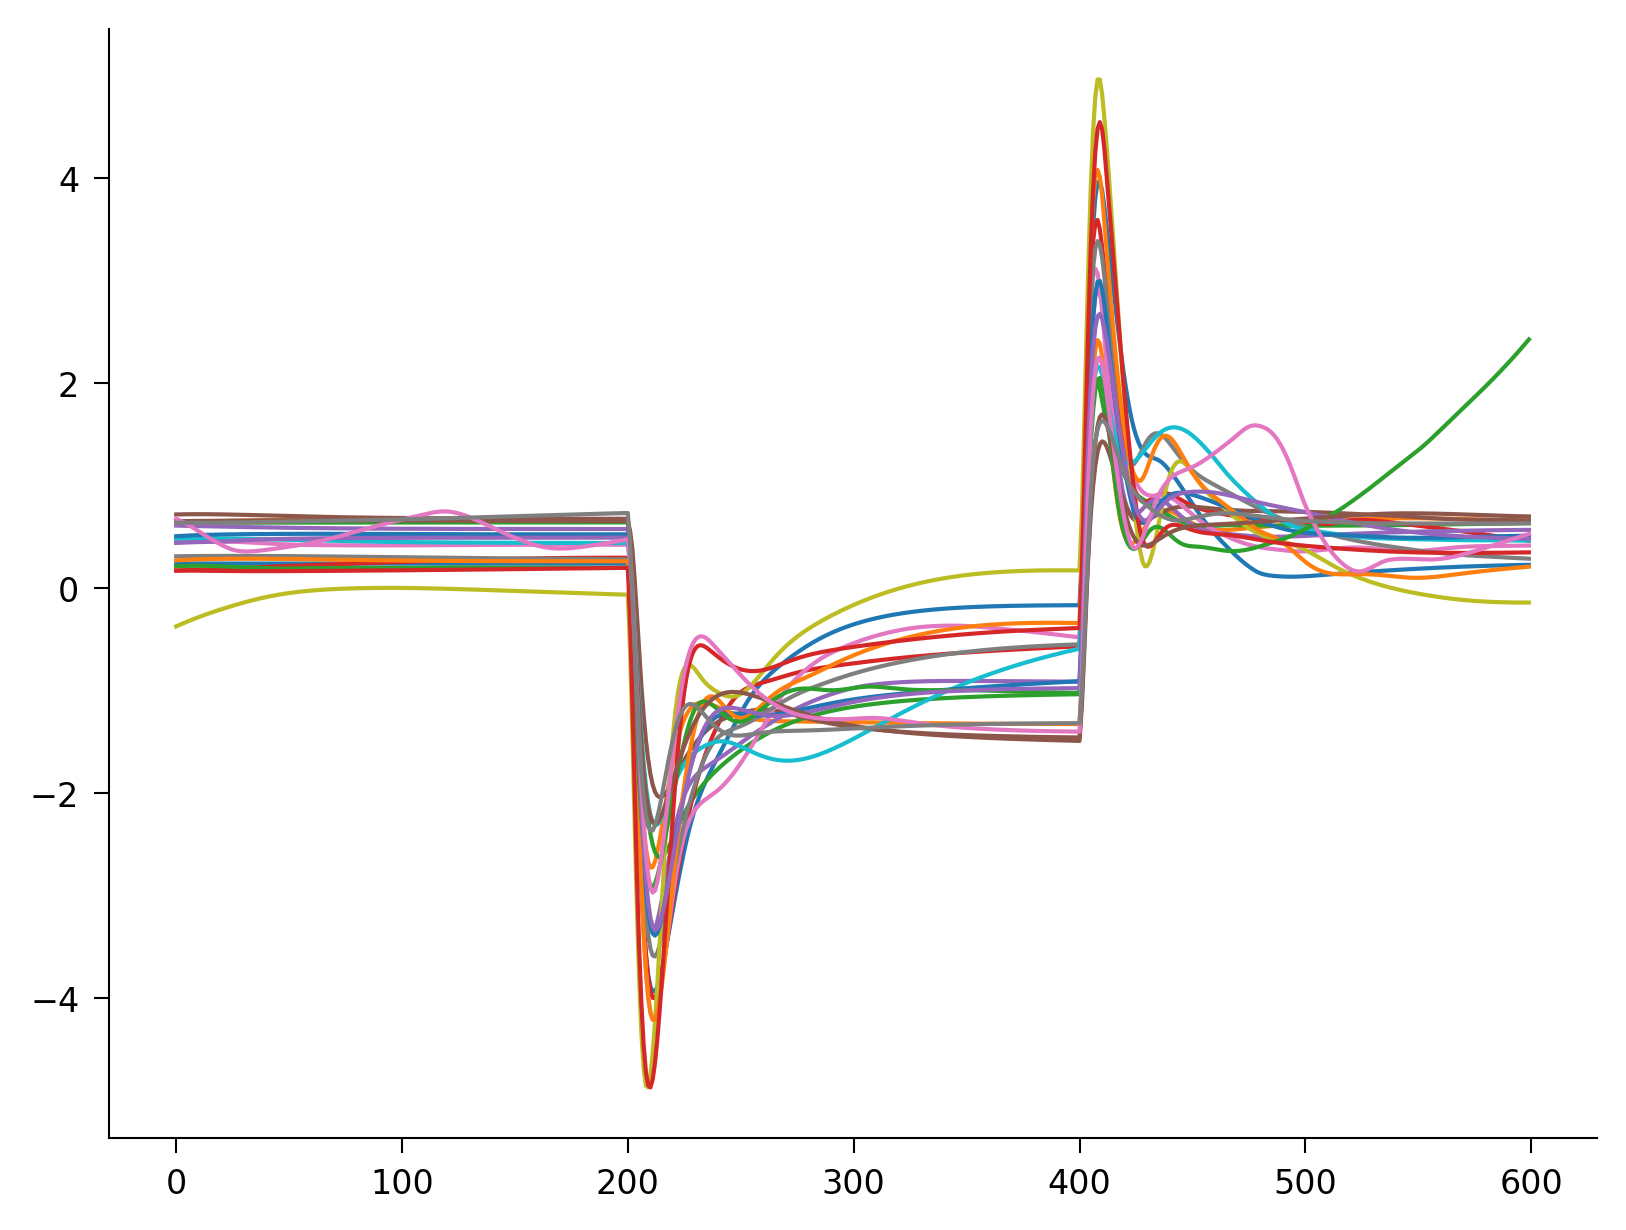

In [27]:
%matplotlib inline
plt.plot(zr_on[ci[0]].T, label="L1 ON-flash response")

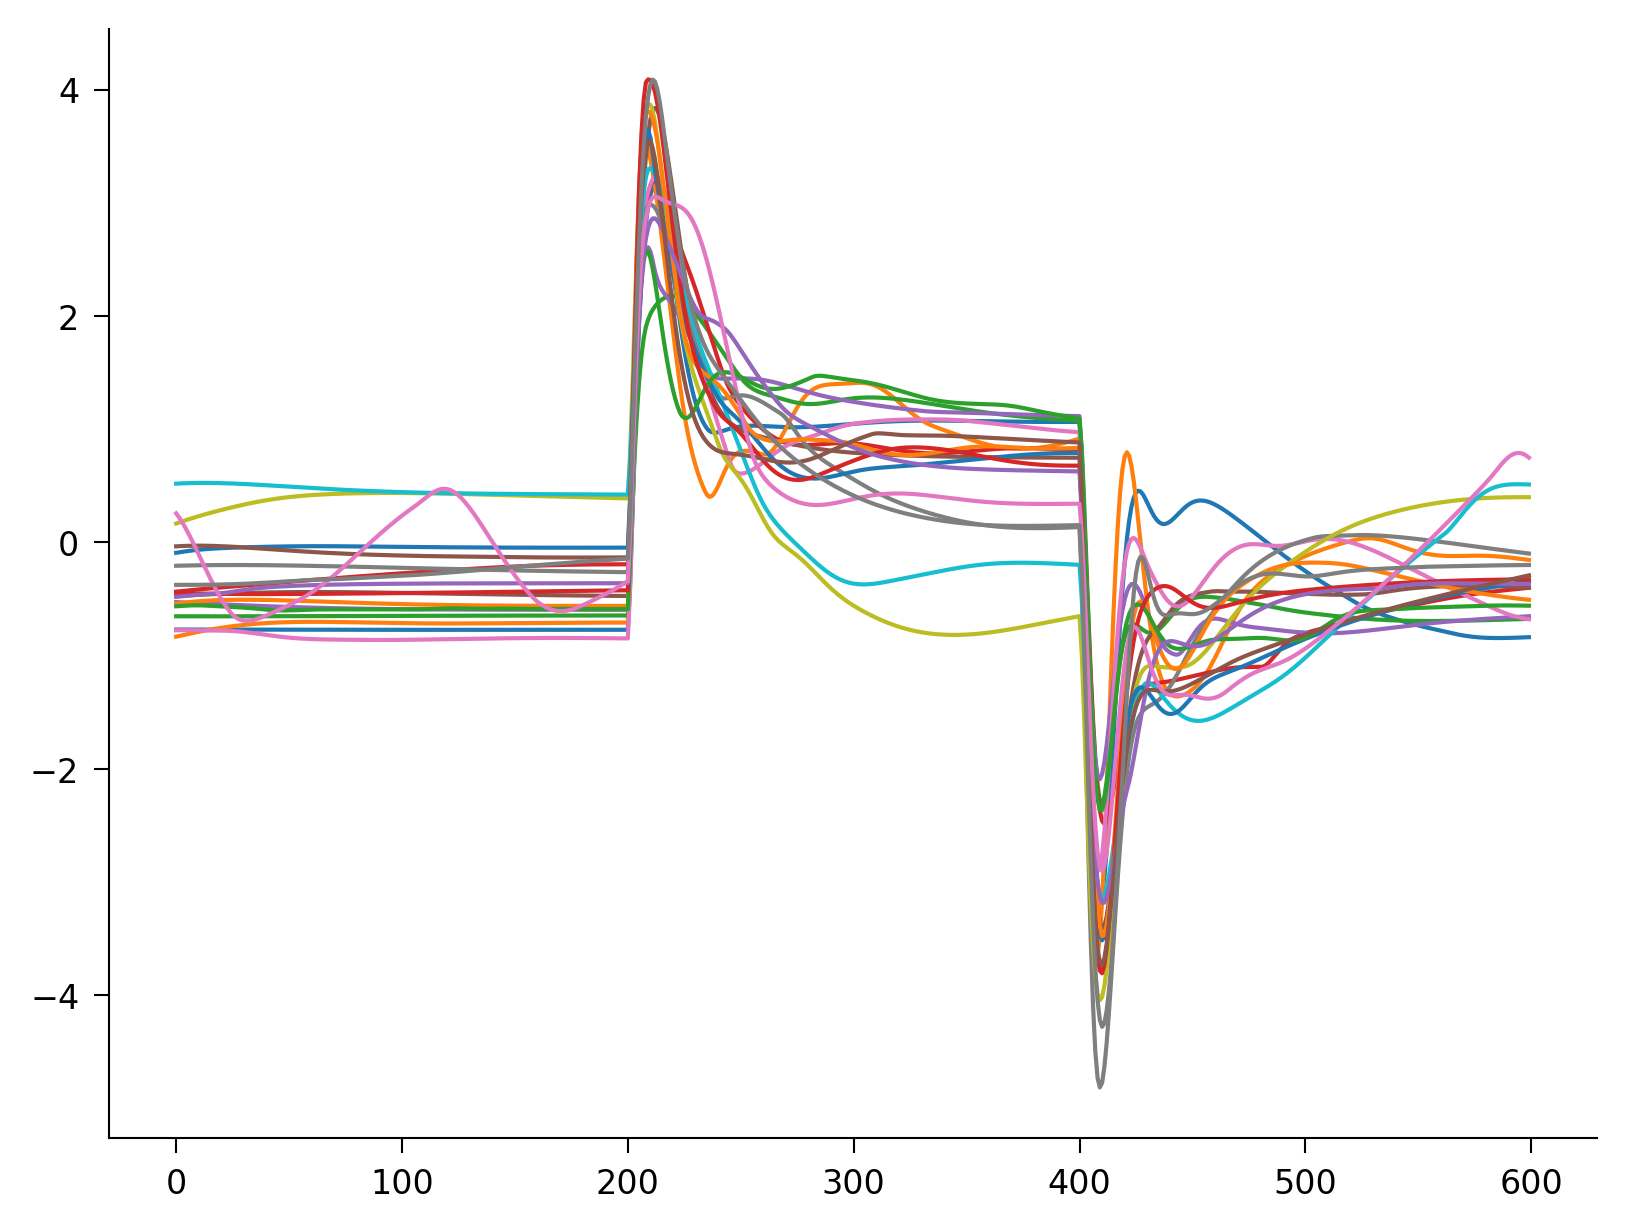

In [28]:
plt.plot(zr_off[ci[0]].T, label="L1 OFF-flash response")

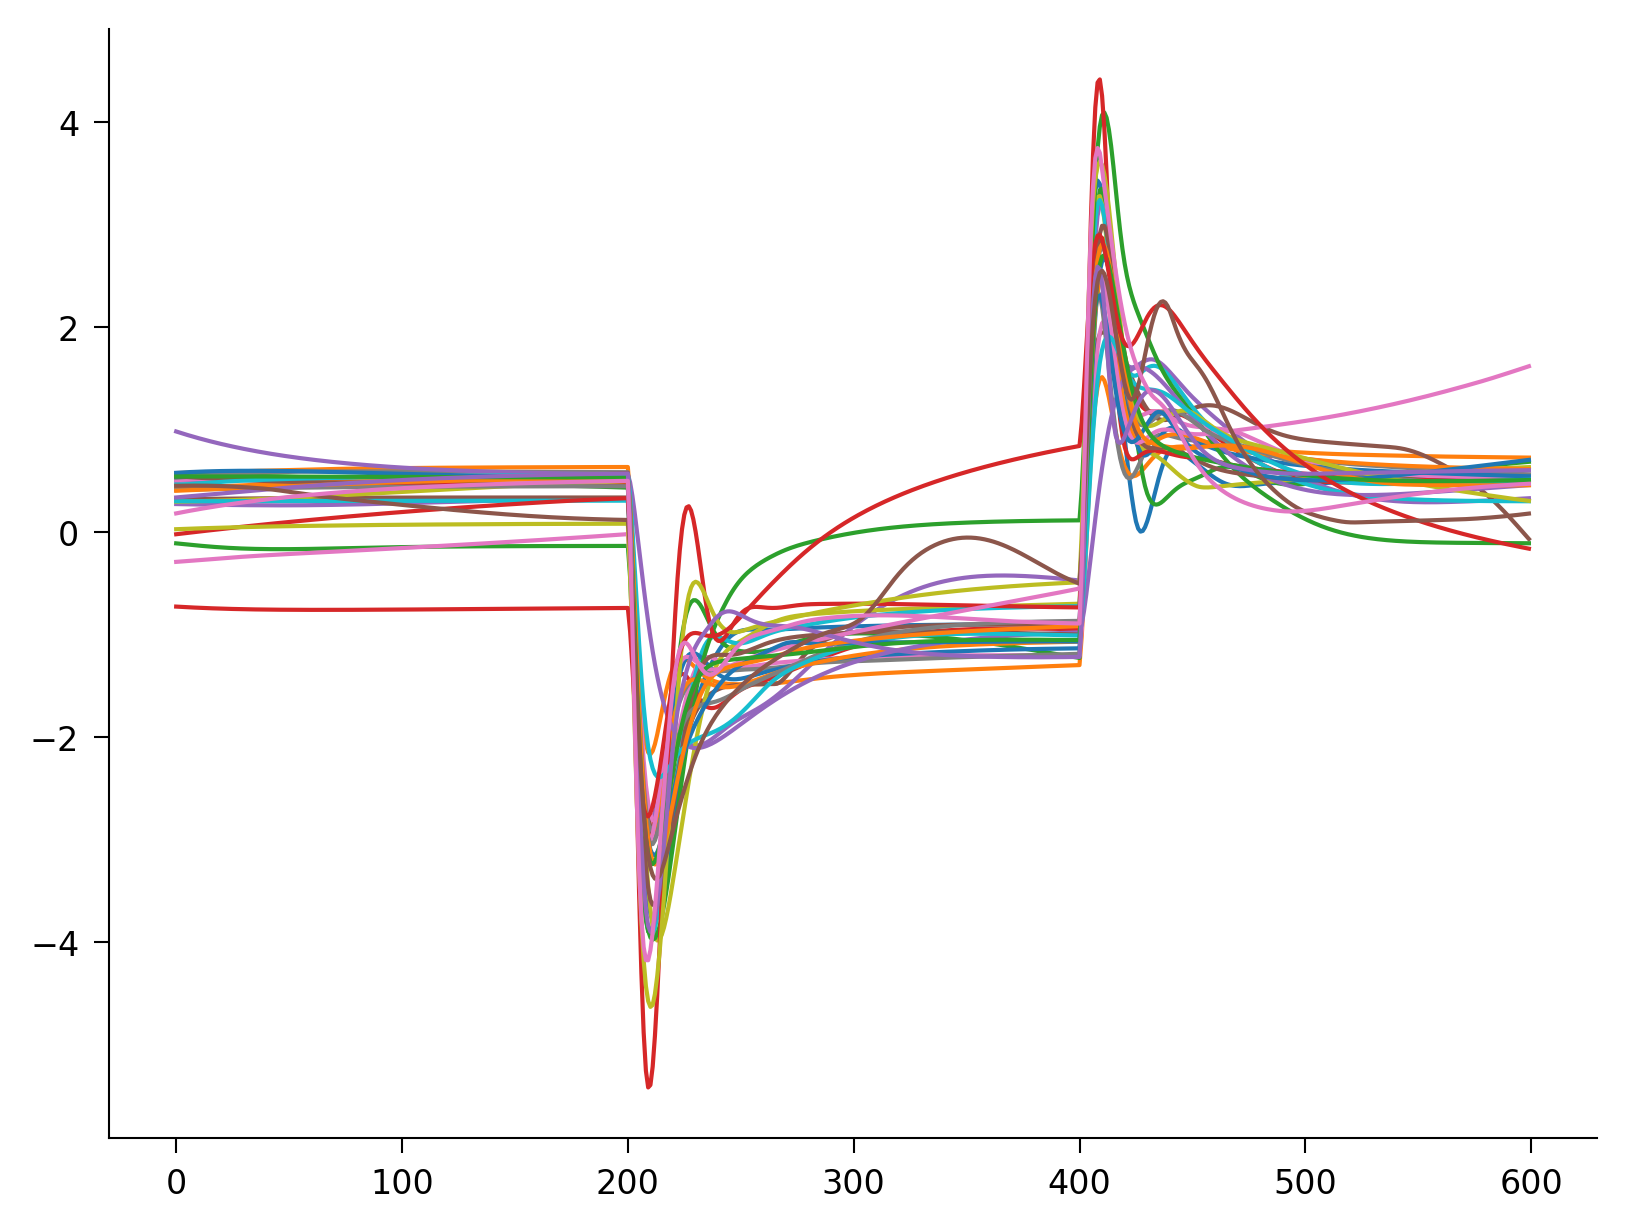

In [29]:
%matplotlib inline
plt.plot(zr_on[ci[1]].T, label="L1 ON-flash response")

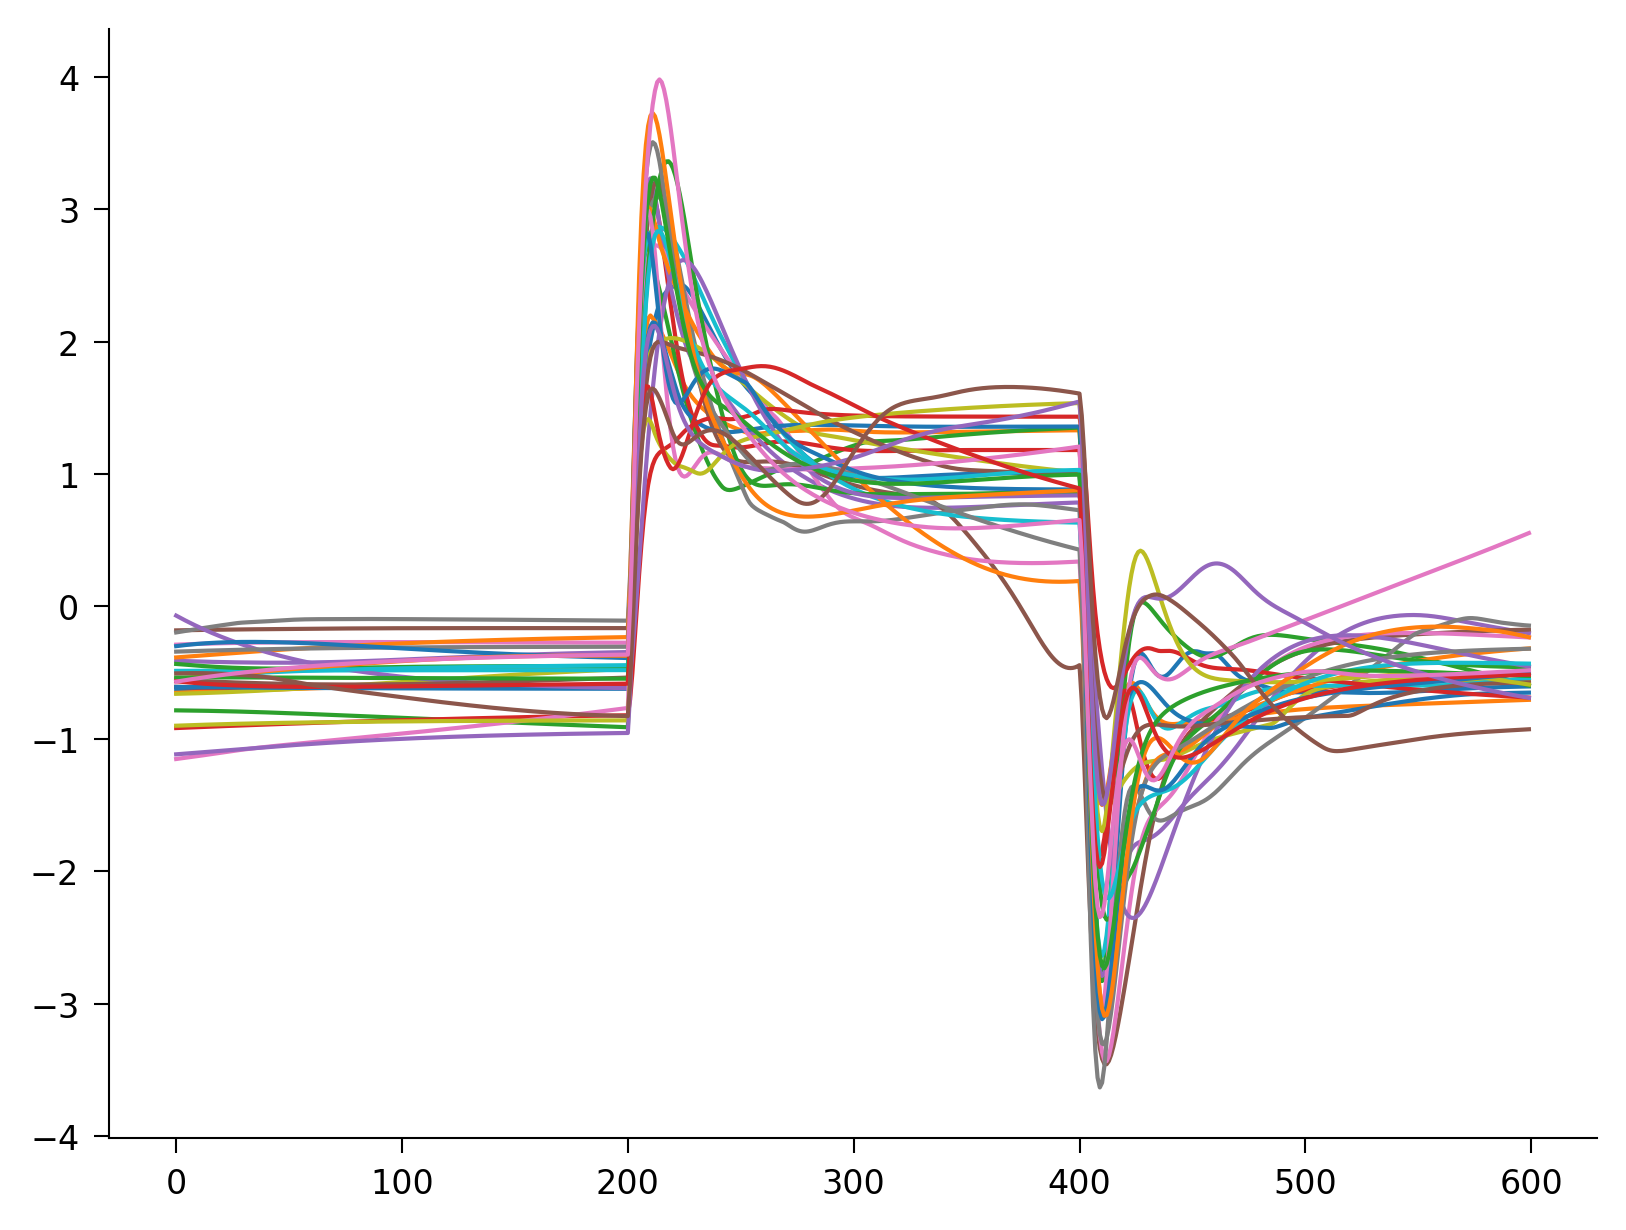

In [30]:
plt.plot(zr_off[ci[1]].T, label="L1 OFF-flash response")

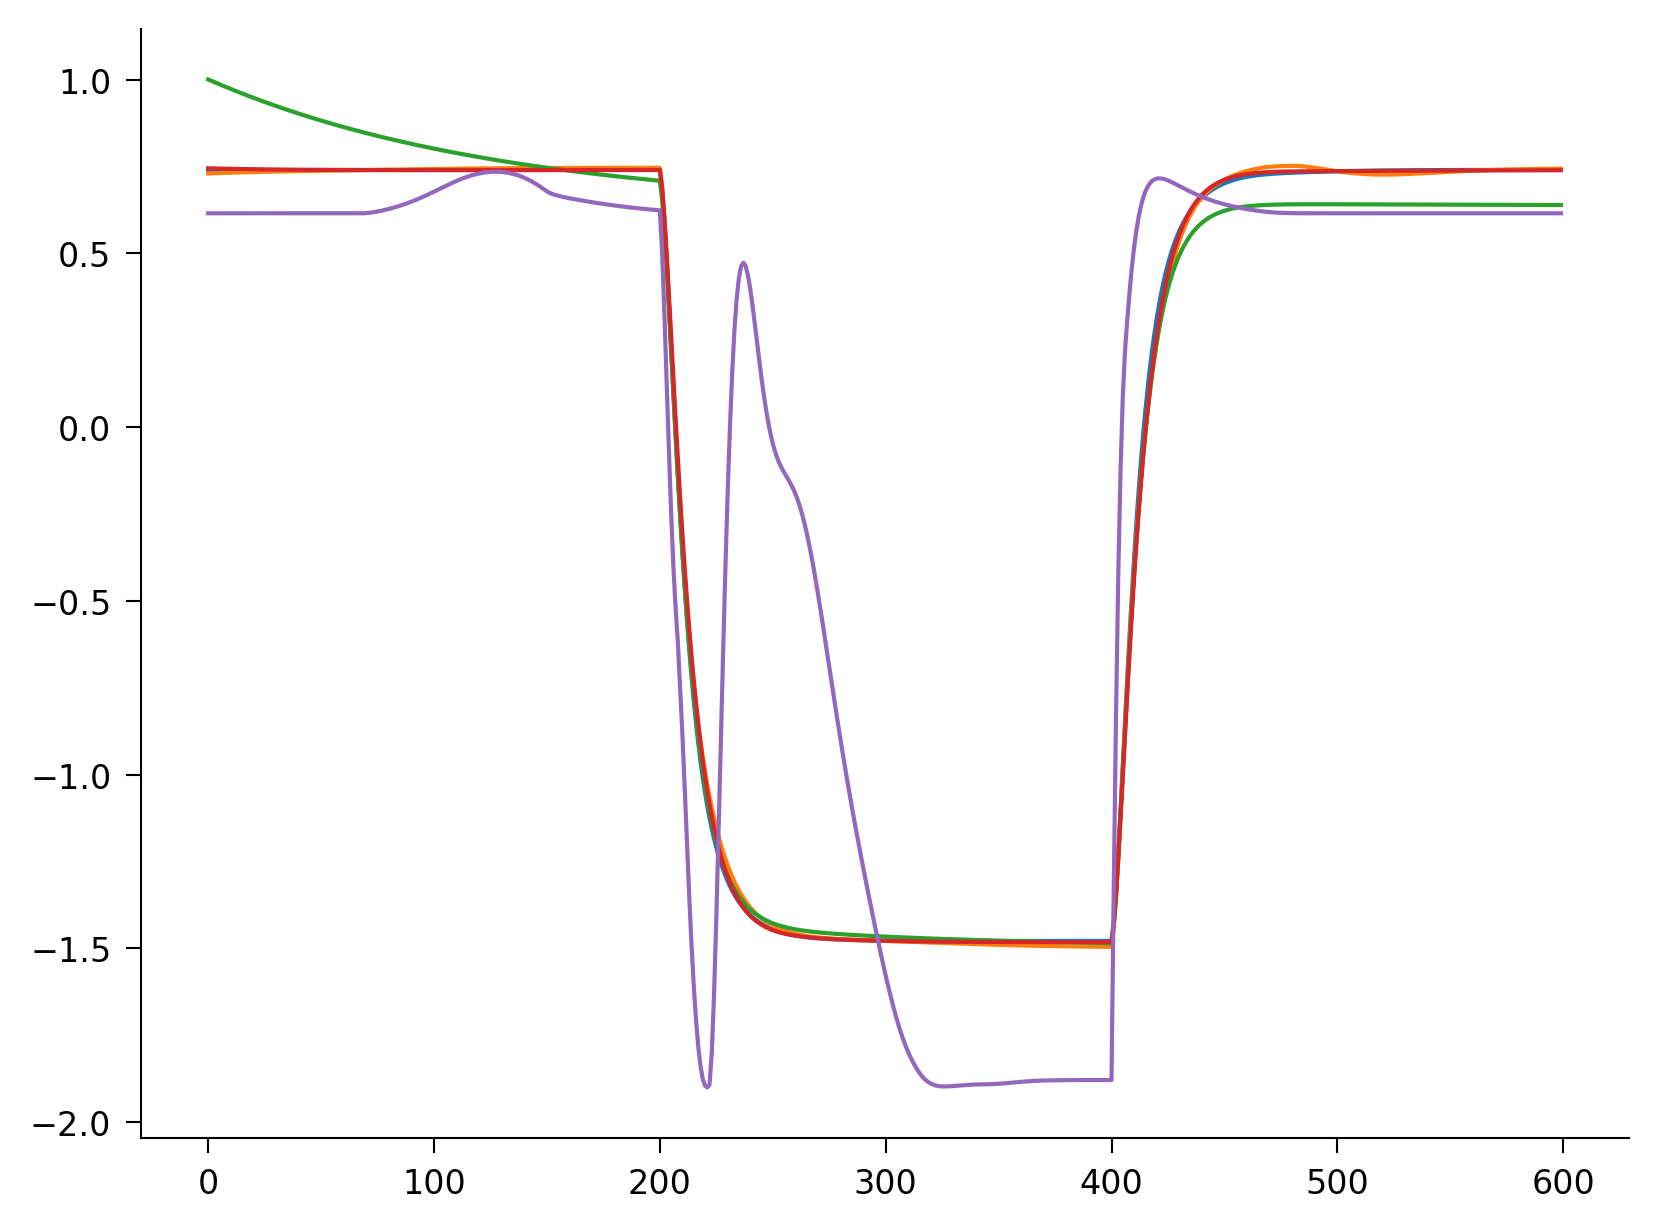

In [31]:
plt.plot(zr_on[ci[2]].T, label="L1 ON-flash response")

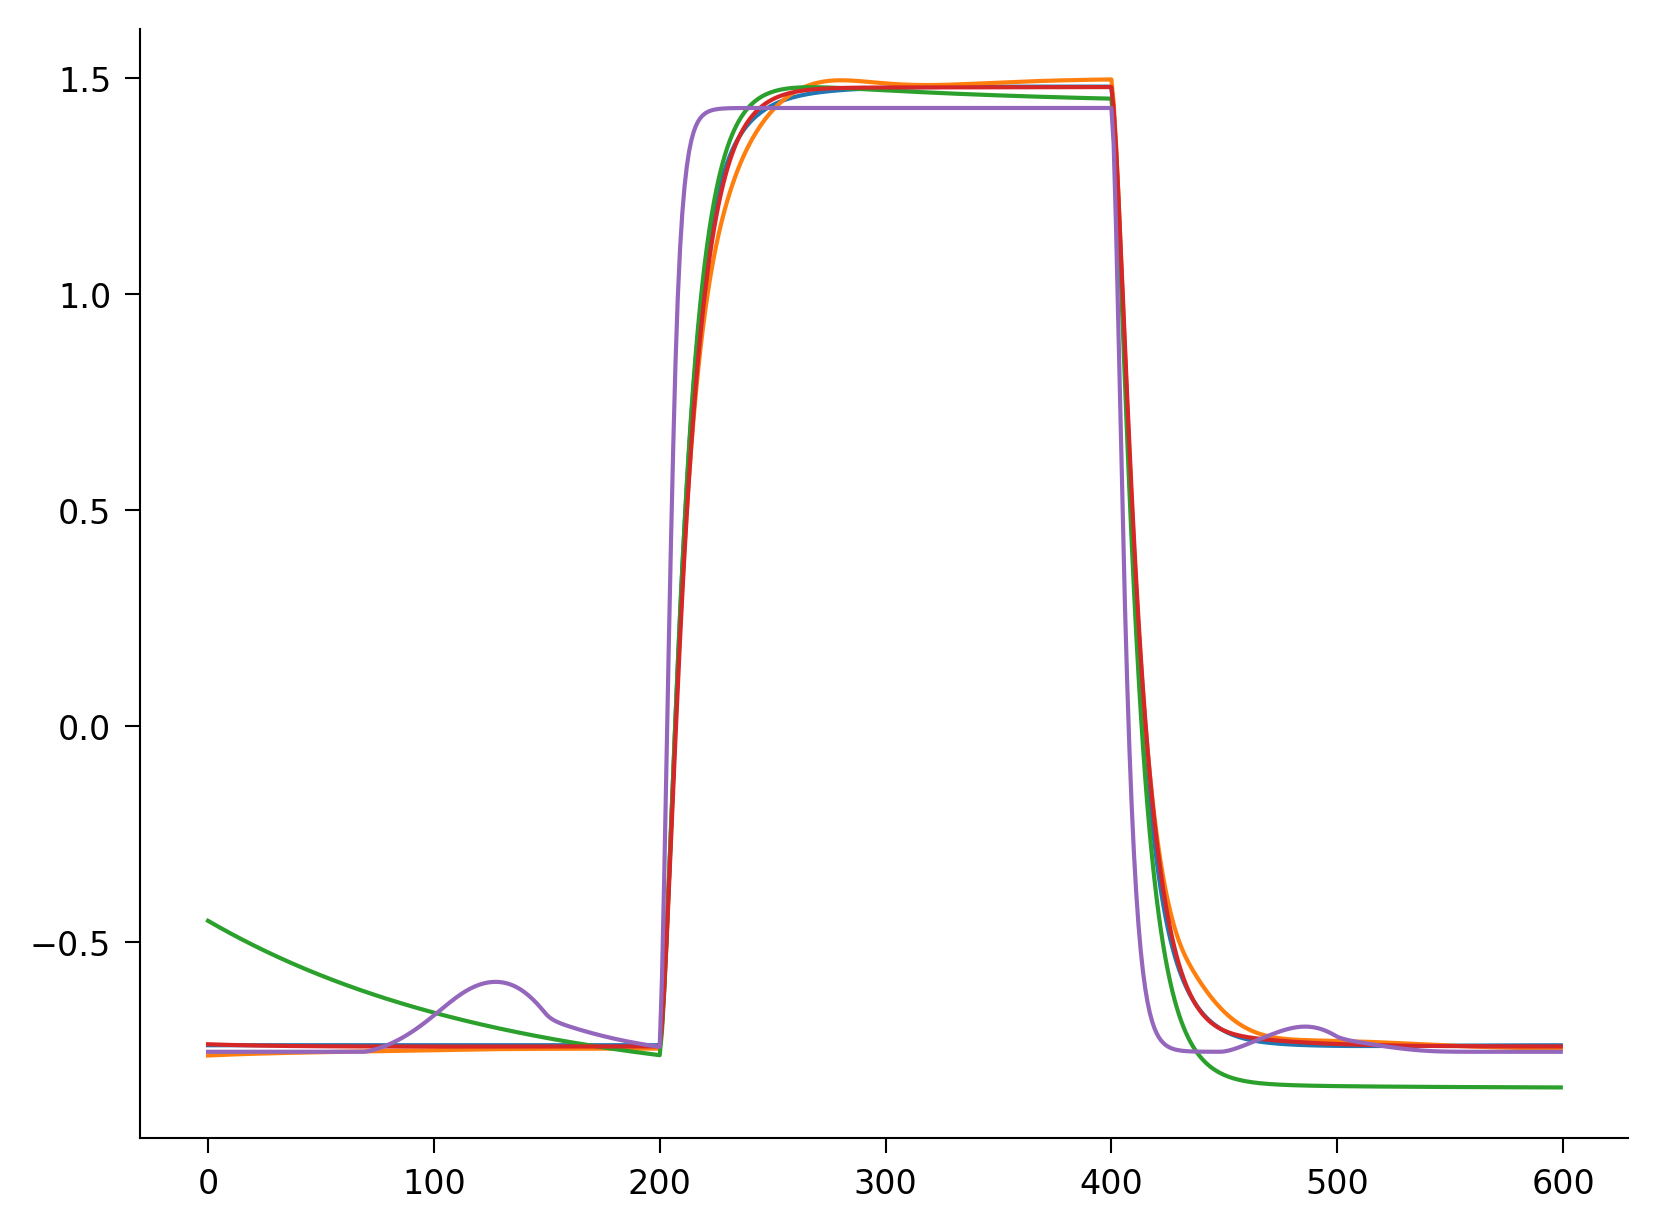

In [32]:
%matplotlib inline
plt.plot(zr_off[ci[2]].T, label="L1 OFF-flash response")

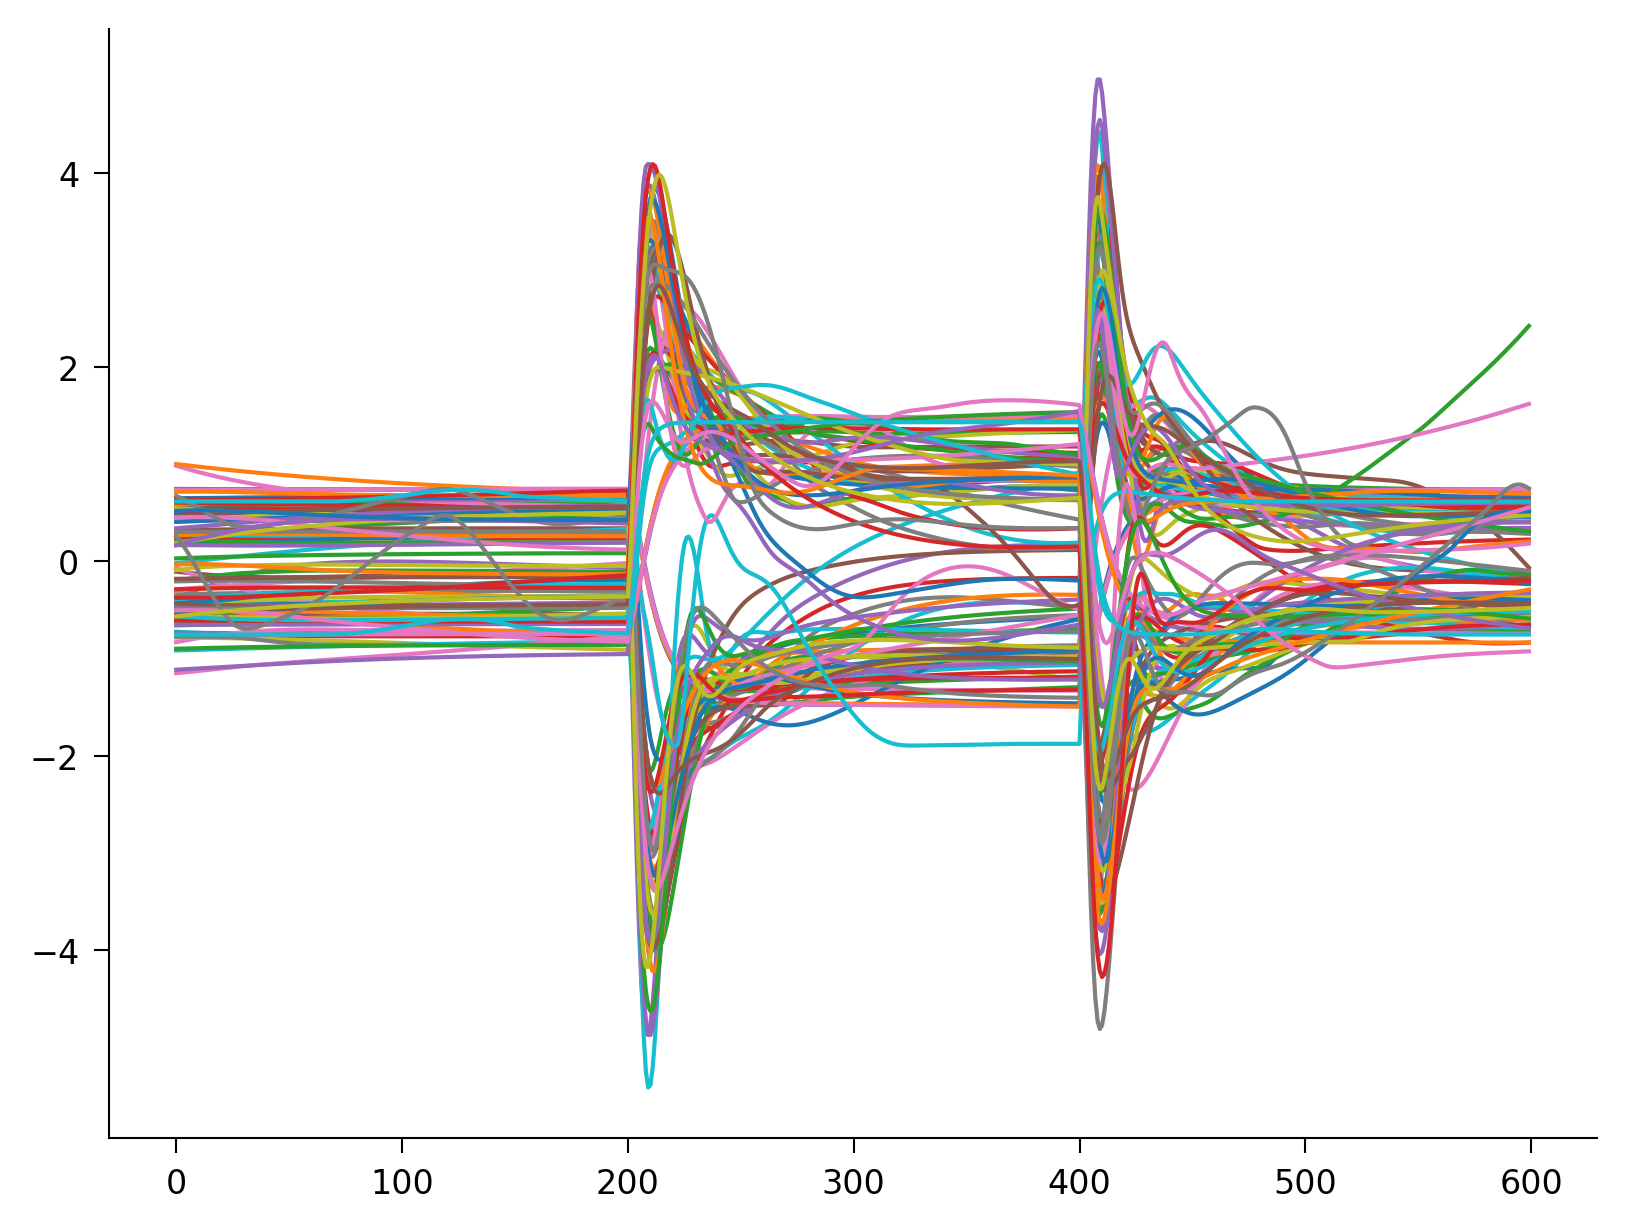

In [40]:
%matplotlib inline
plt.plot(zr_on.T, label="L1 ON-flash response")
plt.plot(zr_off.T, label="L1 OFF-flash response")
plt.show()

In [65]:
def flash_response_index(dataset, r_on, r_off, nonnegative=True):
    
    # to numpy, because tensors lead to unexpected behavior
    r_on = np.array(r_on)
    r_off = np.array(r_off)
    
    t_stim = dataset.config.t_stim
    n_alternations = len(
        dataset.config.alternations
    )  # alternations baseline - flash - baseline
    dt = dataset.config.dt
    time = np.arange(0, t_stim * n_alternations, dt)

    # relevant time window
    # start one time step before stimulus onset at which both potentials
    # should be at the same resting state.
    mask = (time >= t_stim - dt) & (time < 2 * t_stim)
    r_on = r_on[:, mask]
    r_off = r_off[:, mask]


    # because conventionally, index computed on nonnegative spike rates
    # or calcium traces. lifting the traces to nonnegative magnitudes
    if nonnegative:
        minimum = np.minimum(r_on, r_off).min(axis=1, keepdims=True)
        r_on += np.abs(minimum)
        r_off += np.abs(minimum)


    on_peak = r_on.max(axis=1)
    off_peak = r_off.max(axis=1)
    fri = on_peak - off_peak
    fri /= on_peak + off_peak + 1e-16

    return fri

In [45]:
from flyvision.plots.plots import violin_groups

In [46]:
violin_groups??

In [59]:
flash_response_index(dataset, r_on, r_off)

array([-1.        , -0.15166445, -0.18519792, -0.17336024, -0.5257508 ,
       -0.07384802, -0.17755915, -0.07338632, -0.16232914, -0.05479339],
      dtype=float32)

(-1.0, 1.0)

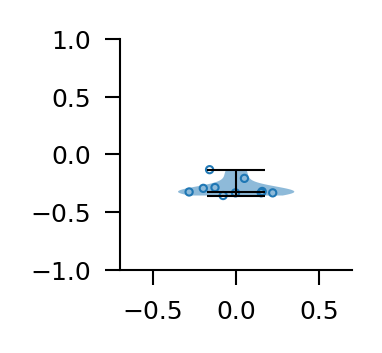

In [67]:
fig, ax, _ = violin_groups(flash_response_index(dataset, r_on, r_off)[None, None], figsize=[1, 1])
ax.set_ylim(-1, 1)

In [64]:
np.minimum(r_on, r_off).min(axis=1, keepdims=True)

array([[-2.6310782e+00],
       [-5.4995185e-01],
       [ 1.7146116e-02],
       [-1.6836413e+00],
       [-1.9865671e+00],
       [-2.0501876e-01],
       [-1.3791137e+00],
       [-1.6105901e-01],
       [-5.1150459e-01],
       [ 1.4538039e-04]], dtype=float32)

In [50]:
with ensemble.model_ratio(0.2):
    rank_by_validation_error

['opticflow/000/0028', 'opticflow/000/0011', 'opticflow/000/0010', 'opticflow/000/0041', 'opticflow/000/0045', 'opticflow/000/0038', 'opticflow/000/0002', 'opticflow/000/0017', 'opticflow/000/0027', 'opticflow/000/0031']


In [57]:
with ensemble.model_ratio(0.2):
    print(ensemble._model_index)

[0 1 2 3 4 5 6 7 8 9]


In [51]:
    on_flash_response = np.array(list(ensemble.simulate(dataset[3][None, :, None], 1/200)))
    on_flash_response = LayerActivity(on_flash_response, ensemble[0].network.ctome, keepref=True)

    off_flash_response = np.array(list(ensemble.simulate(dataset[1][None, :, None], 1/200)))
    off_flash_response = LayerActivity(off_flash_response, ensemble[0].network.ctome, keepref=True)

    r_on = on_flash_response.central.L1.squeeze()
    zr_on = (r_on - r_on.mean(axis=1, keepdims=True)) / (r_on.std(axis=1, keepdims=True) + 1e-15)

    r_off = off_flash_response.central.L1.squeeze()
    zr_off = (r_off - r_off.mean(axis=1, keepdims=True)) / (r_off.std(axis=1, keepdims=True) + 1e-15)

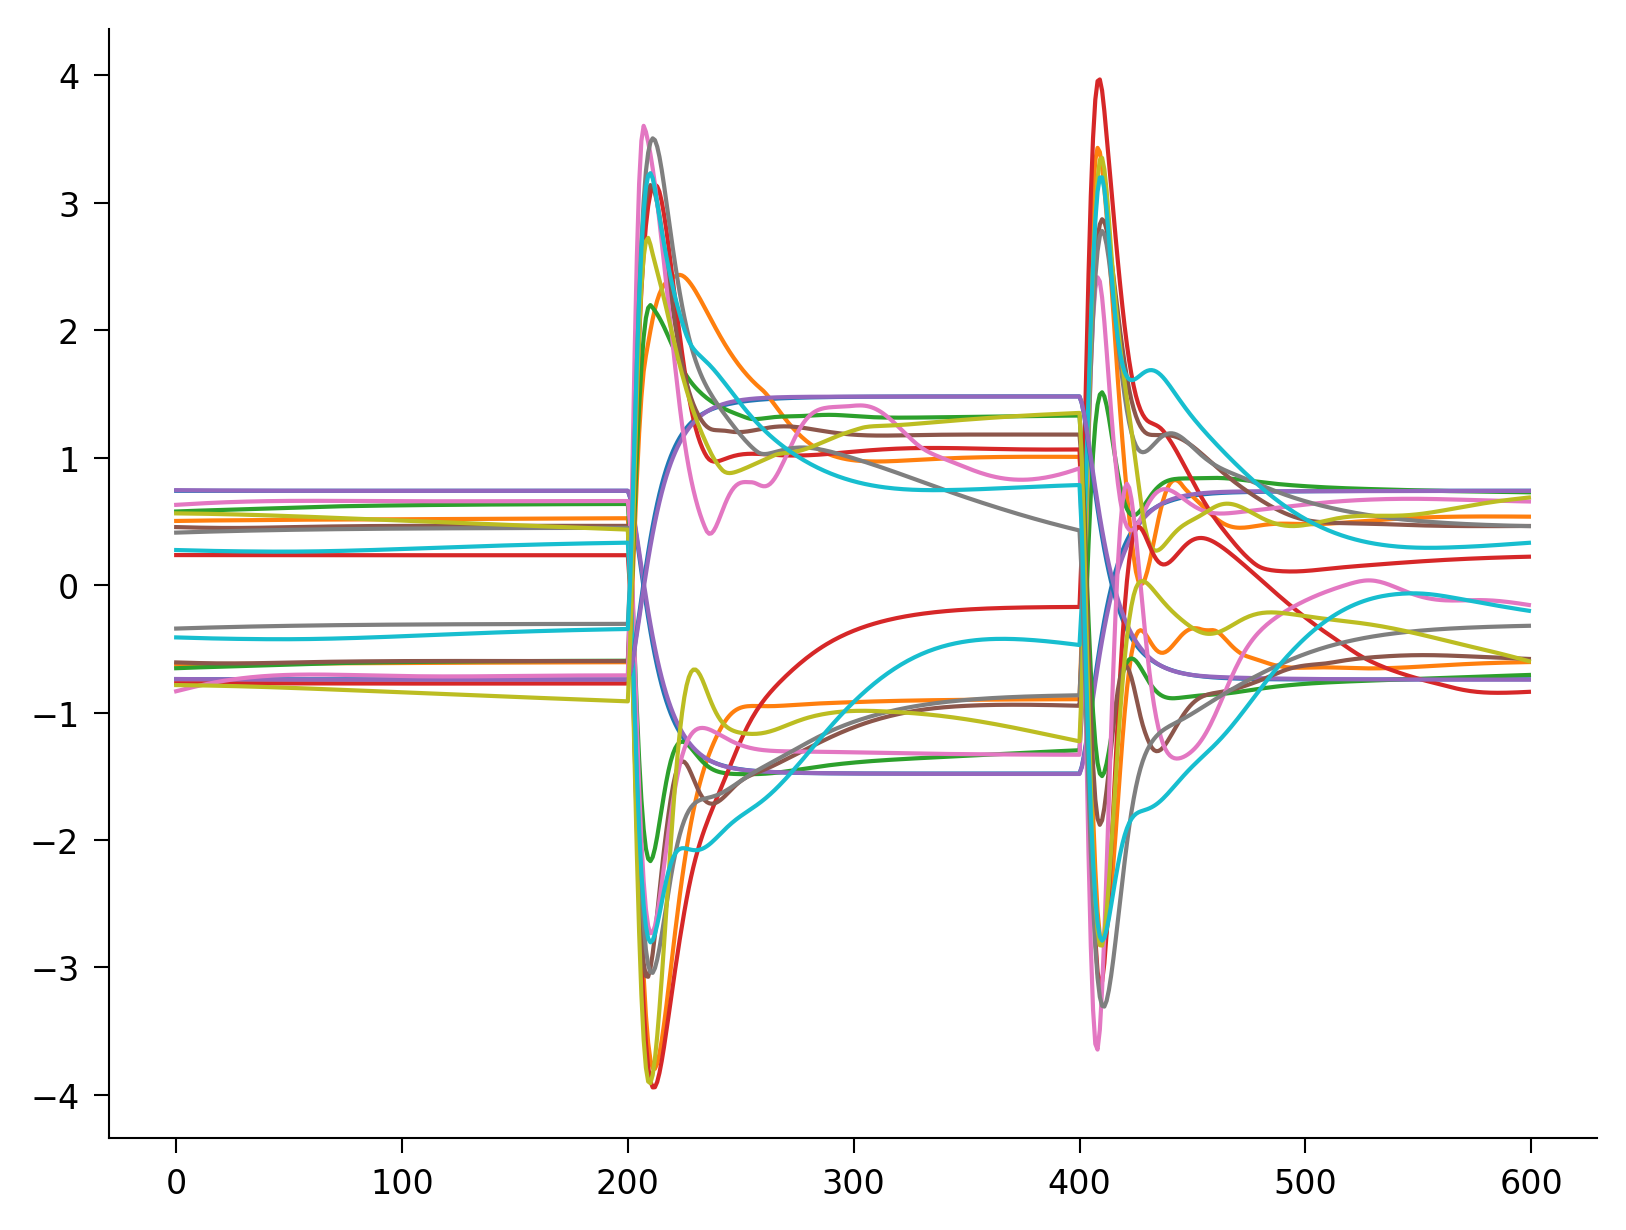

In [52]:
%matplotlib inline
plt.plot(zr_on.T, label="L1 ON-flash response")
plt.plot(zr_off.T, label="L1 OFF-flash response")
plt.show()

(-1.0, 1.0)

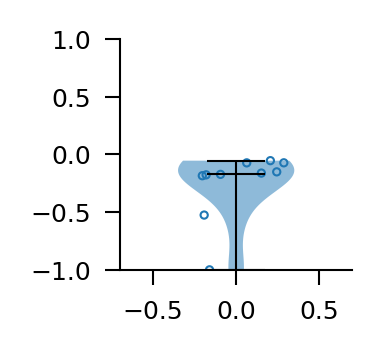

In [58]:
fig, ax, _ = violin_groups(flash_response_index(dataset, r_on[:10], r_off[:10])[None, None], figsize=[1, 1])
ax.set_ylim(-1, 1)